# Exercises Sheet 2 Introduction to Machine Learning

# Exercicio 2

## Exercicio 1


w0 é o bias
w1 associado à entrada 1 
w2 associado à entrada 2

## Exercicio 1 Parte 2 (a partir do 1.7)

pontos gerados por uma gaussiana têm label 0
gerados pela outra gaussiana têm label 1


Vamos treinar o pecetrão para descubrir se foi gerado por uma gaussiana ou por outra.

## Exercício 2

## Exercício 3

## Exercicio 4

Nem é preciso programar? Calcular entropias etc.



# Exercicio 1

In [430]:
import numpy as np
# Exercise 1.1
print ("Using operator AND")

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

d = np.array([0, 0, 0, 1])

# Display input, expected output (d), and perceptron output
for i in range(len(X)):
    print(f"Input: {X[i]} | Target: {d[i]}")

Using operator AND
Input: [0 0] | Target: 0
Input: [0 1] | Target: 0
Input: [1 0] | Target: 0
Input: [1 1] | Target: 1


In [431]:
# Exercise 1.2
# Initialize w0, w1, and w2 to small random values
# np.random.seed(9)  # For reproducibility
w0 = np.random.rand()
print (f"w0 (bias) is {w0}")
w1 = np.random.rand()
print (f"w1 is {w1}")
w2 = np.random.rand()
print (f"w2 is {w2}")

# Activation function f(s)#
def activation(s):
    return 1 if s > 0.5 else 0

# Calculate outputs for each input pattern
o = []
for x1, x2 in X:
    s = w0 + w1 * x1 + w2 * x2
    o.append(activation(s))
    #o.append(s)

o = np.array(o)
print(f"Output vector o: {o}")


w0 (bias) is 0.33776348154592317
w1 is 0.5050476560014082
w2 is 0.14253823664294274
Output vector o: [0 0 1 1]


In [432]:
# Exercise 1.3
# Calculate the error e = d - o
e = d - o

# Display input, expected output (d), perceptron output (o), and the difference (error e)
for i in range(len(X)):
    print(f"Input: {X[i]} | Target: {d[i]} | Output: {o[i]} | Error: {e[i]}")


Input: [0 0] | Target: 0 | Output: 0 | Error: 0
Input: [0 1] | Target: 0 | Output: 0 | Error: 0
Input: [1 0] | Target: 0 | Output: 1 | Error: -1
Input: [1 1] | Target: 1 | Output: 1 | Error: 0


In [433]:
# Learning rate
alpha = 1e-4

# Initialize update terms for w0, w1, and w2
delta_w0 = 0
delta_w1 = 0
delta_w2 = 0

# Update each weight based on the error for each input pattern
for i in range(len(X)):
    x1, x2 = X[i]
    delta_w0 += alpha * e[i]
    delta_w1 += alpha * x1 * e[i]
    delta_w2 += alpha * x2 * e[i]

# Display the update terms
print(f"∆w0: {delta_w0}")
print(f"∆w1: {delta_w1}")
print(f"∆w2: {delta_w2}")


∆w0: -0.0001
∆w1: -0.0001
∆w2: 0.0


  Input: [0 0], Target: 0, Output: 0, Error: 0
  Input: [0 1], Target: 0, Output: 0, Error: 0
  Input: [1 0], Target: 0, Output: 1, Error: -1
  Input: [1 1], Target: 1, Output: 1, Error: 0
End of Epoch 1 | w0: 0.3368, w1: 0.5040, w2: 0.1425 | Total Error: 1
  Input: [0 0], Target: 0, Output: 0, Error: 0
  Input: [0 1], Target: 0, Output: 0, Error: 0
  Input: [1 0], Target: 0, Output: 1, Error: -1
  Input: [1 1], Target: 1, Output: 1, Error: 0
End of Epoch 2 | w0: 0.3358, w1: 0.5030, w2: 0.1425 | Total Error: 1
  Input: [0 0], Target: 0, Output: 0, Error: 0
  Input: [0 1], Target: 0, Output: 0, Error: 0
  Input: [1 0], Target: 0, Output: 1, Error: -1
  Input: [1 1], Target: 1, Output: 1, Error: 0
End of Epoch 3 | w0: 0.3348, w1: 0.5020, w2: 0.1425 | Total Error: 1
  Input: [0 0], Target: 0, Output: 0, Error: 0
  Input: [0 1], Target: 0, Output: 0, Error: 0
  Input: [1 0], Target: 0, Output: 1, Error: -1
  Input: [1 1], Target: 1, Output: 1, Error: 0
End of Epoch 4 | w0: 0.3338, w1: 0.50

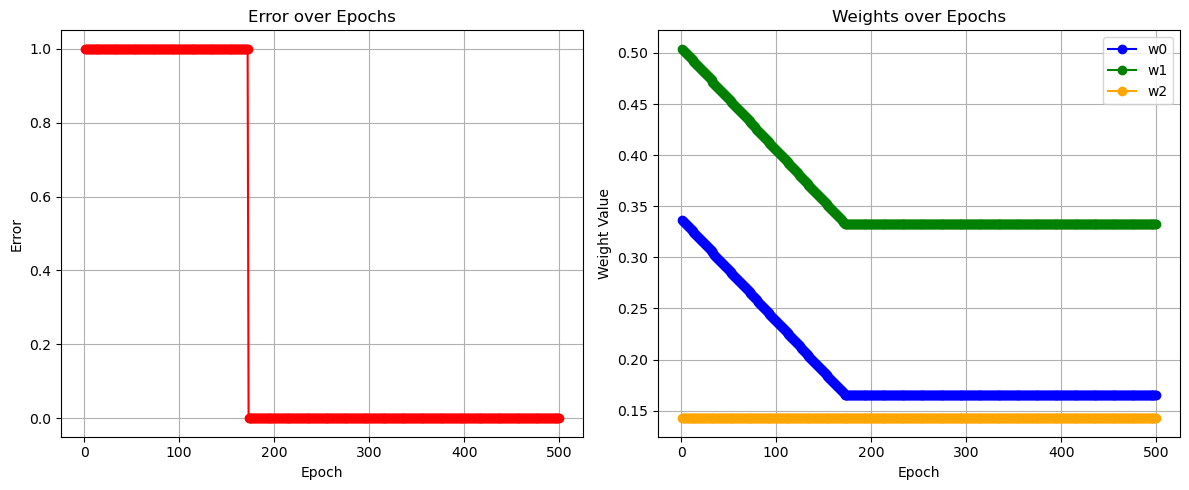

In [434]:
import matplotlib.pyplot as plt

optimal_found = False
optimal_epoch = None

# Training parameters
alpha = 10e-4  # Learning rate
epochs = 500  # Number of epochs

# Activation function
def activation(s):
    return 1 if s > 0.5 else 0

# Lists to store values for plotting
errors = []
weights_w0 = []
weights_w1 = []
weights_w2 = []

# Training loop over epochs
for epoch in range(epochs):
    # Initialize update terms for each epoch
    delta_w0 = 0
    delta_w1 = 0
    delta_w2 = 0

    # Track cumulative error for the epoch
    epoch_error = 0

    # Process each input pattern
    for i in range(len(X)):
        x1, x2 = X[i]
        
        # Calculate output
        s = w0 + w1 * x1 + w2 * x2
        o = activation(s)

        # Calculate error
        e = d[i] - o
        epoch_error += abs(e)  # Summing absolute error for tracking

        # Update terms for weights
        delta_w0 += alpha * e
        delta_w1 += alpha * x1 * e
        delta_w2 += alpha * x2 * e
        print(f"  Input: {X[i]}, Target: {d[i]}, Output: {o}, Error: {e}")

    # Update weights at the end of each epoch
    w0 += delta_w0
    w1 += delta_w1
    w2 += delta_w2

    # Print weights and cumulative error after each epoch
    print(f"End of Epoch {epoch + 1} | w0: {w0:.4f}, w1: {w1:.4f}, w2: {w2:.4f} | Total Error: {epoch_error}")

    if not optimal_found and epoch_error==0:
        optimal_found = True
        print(f"The optimal solution was found on epoch {epoch + 1}!")
        optimal_epoch = epoch + 1


    # Store values for plotting
    errors.append(epoch_error)
    weights_w0.append(w0)
    weights_w1.append(w1)
    weights_w2.append(w2)

print(f"The optimal solution was found on epoch {optimal_epoch}!")

# Plotting results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Error over epochs
ax1.plot(range(1, epochs + 1), errors, marker='o', color='r')
ax1.set_title("Error over Epochs")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Error")
ax1.grid(True)

# Plot 2: Weight values over epochs
ax2.plot(range(1, epochs + 1), weights_w0, marker='o', label="w0", color='b')
ax2.plot(range(1, epochs + 1), weights_w1, marker='o', label="w1", color='g')
ax2.plot(range(1, epochs + 1), weights_w2, marker='o', label="w2", color='orange')
ax2.set_title("Weights over Epochs")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Weight Value")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

## Exercicio 1.7

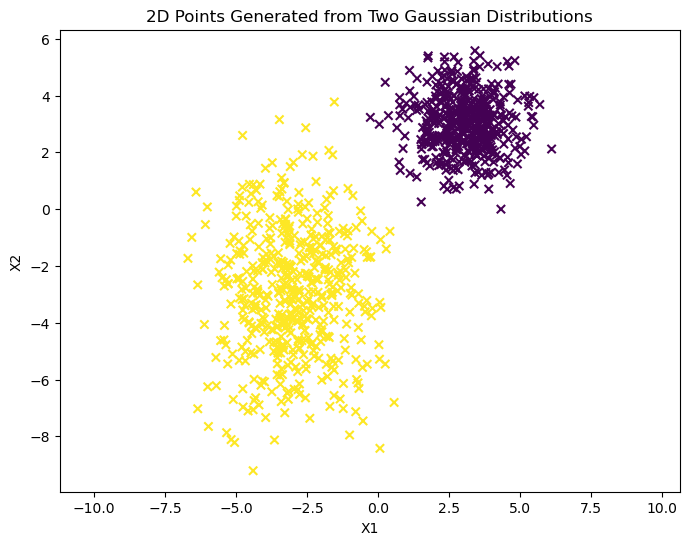

Dataset saved to 'my_data.csv'


In [435]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

num_points = 500

# Generate points for class 'a'
mean_a = [3, 3]
cov_a = [[1, 0], [0, 1]]
a = np.random.multivariate_normal(mean_a, cov_a, num_points)
label_a = np.zeros((num_points, 1))  # Column of zeros for the first dataset
a = np.hstack((a, label_a))  # Combine points with labels

# Generate points for class 'b'
mean_b = [-3, -3]
cov_b = [[2, 0], [0, 5]]
b = np.random.multivariate_normal(mean_b, cov_b, num_points) # .T #TODO ?
label_b = np.ones((num_points, 1))  # Column of ones for the second dataset
b = np.hstack((b, label_b))  # Combine points with labels

# Join and shuffle the dataset
dataset = np.vstack((a, b))
np.random.shuffle(dataset)

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(dataset[:, 0], dataset[:, 1], c=dataset[:, 2], cmap='viridis', marker='x')
plt.axis('equal')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('2D Points Generated from Two Gaussian Distributions')
plt.show()

# Save the dataset to a CSV file
df = pd.DataFrame(dataset, columns=['X1', 'X2', 'Label'])
df.to_csv("generated_dataset.csv", index=False)
print("Dataset saved to 'my_data.csv'")



In [436]:
import numpy as np
import pandas as pd

# Load the generated dataset
data = pd.read_csv("generated_dataset.csv").values
X = data[:, :2]  # Features (first two columns)
y = data[:, 2]   # Labels (third column)

# Perceptron parameters
alpha = 1e-2  # Learning rate
epochs = 50   # Number of epochs (adjustable for faster convergence)

# Initialize weights randomly between 0 and 1
w0, w1, w2 = np.random.rand(), np.random.rand(), np.random.rand()

# Activation function
def activation(s):
    return 1 if s > 0.5 else 0

# Training loop
for epoch in range(epochs):
    # Initialize update terms
    delta_w0, delta_w1, delta_w2 = 0, 0, 0
    epoch_error = 0  # Track total error

    # Iterate over all data points
    for i in range(len(X)):
        x1, x2 = X[i]
        
        # Calculate output
        s = w0 + w1 * x1 + w2 * x2
        o = activation(s)

        # Calculate error
        e = y[i] - o
        epoch_error += abs(e)  # Accumulate absolute error for the epoch

        # Update weight terms based on error
        delta_w0 += alpha * e
        delta_w1 += alpha * x1 * e
        delta_w2 += alpha * x2 * e

    # Update weights at the end of each epoch
    w0 += delta_w0
    w1 += delta_w1
    w2 += delta_w2

    # Print weights and error after each epoch
    print(f"Epoch {epoch + 1}/{epochs} | w0: {w0:.4f}, w1: {w1:.4f}, w2: {w2:.4f} | Total Error: {epoch_error}")


Epoch 1/50 | w0: 0.0755, w1: -29.7394, w2: -29.4086 | Total Error: 999.0
Epoch 2/50 | w0: 0.1155, w1: -29.8138, w2: -29.3023 | Total Error: 4.0
Epoch 3/50 | w0: 0.1555, w1: -29.8882, w2: -29.1960 | Total Error: 4.0
Epoch 4/50 | w0: 0.1955, w1: -29.9626, w2: -29.0897 | Total Error: 4.0
Epoch 5/50 | w0: 0.2355, w1: -30.0370, w2: -28.9835 | Total Error: 4.0
Epoch 6/50 | w0: 0.2755, w1: -30.1114, w2: -28.8772 | Total Error: 4.0
Epoch 7/50 | w0: 0.3155, w1: -30.1858, w2: -28.7709 | Total Error: 4.0
Epoch 8/50 | w0: 0.3555, w1: -30.2602, w2: -28.6646 | Total Error: 4.0
Epoch 9/50 | w0: 0.3955, w1: -30.3346, w2: -28.5584 | Total Error: 4.0
Epoch 10/50 | w0: 0.4355, w1: -30.4090, w2: -28.4521 | Total Error: 4.0
Epoch 11/50 | w0: 0.4755, w1: -30.4834, w2: -28.3458 | Total Error: 4.0
Epoch 12/50 | w0: 0.5155, w1: -30.5578, w2: -28.2395 | Total Error: 4.0
Epoch 13/50 | w0: 0.5555, w1: -30.6322, w2: -28.1332 | Total Error: 4.0
Epoch 14/50 | w0: 0.5955, w1: -30.7066, w2: -28.0270 | Total Error: 4.0

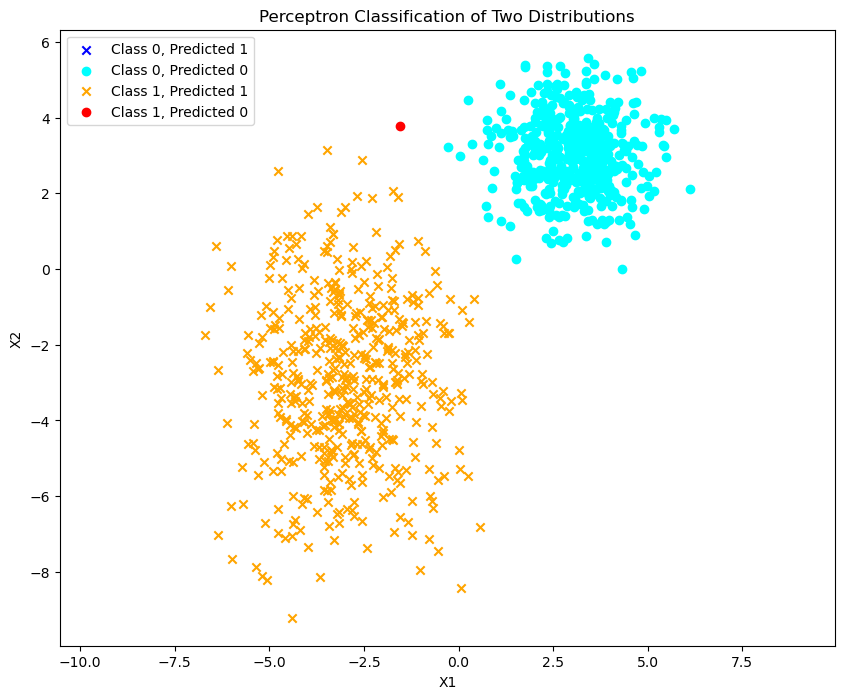

In [437]:
# Exercise 1.8
import matplotlib.pyplot as plt

# Predict labels using the trained perceptron
predicted_labels = []
for i in range(len(X)):
    x1, x2 = X[i]
    s = w0 + w1 * x1 + w2 * x2
    o = activation(s)
    predicted_labels.append(o)

predicted_labels = np.array(predicted_labels)

# Separate points based on true and predicted labels
a1 = X[(y == 0) & (predicted_labels == 1)]  # (a) First distribution, labeled 1
a0 = X[(y == 0) & (predicted_labels == 0)]  # (b) First distribution, labeled 0
b1 = X[(y == 1) & (predicted_labels == 1)]  # (c) Second distribution, labeled 1
b0 = X[(y == 1) & (predicted_labels == 0)]  # (d) Second distribution, labeled 0

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(a1[:, 0], a1[:, 1], color='blue', marker='x', label='Class 0, Predicted 1')
plt.scatter(a0[:, 0], a0[:, 1], color='cyan', marker='o', label='Class 0, Predicted 0')
plt.scatter(b1[:, 0], b1[:, 1], color='orange', marker='x', label='Class 1, Predicted 1')
plt.scatter(b0[:, 0], b0[:, 1], color='red', marker='o', label='Class 1, Predicted 0')

# Set plot parameters
plt.axis('equal')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='best')
plt.title('Perceptron Classification of Two Distributions')
plt.show()


In [438]:
# Ex 1.9
# Corrected confusion matrix calculation
def compute_confusion_matrix(y_true, y_pred):
    # Identify unique class labels and map them to integer indices
    classes = np.unique(y_true)
    class_to_index = {label: idx for idx, label in enumerate(classes)}
    
    # Initialize matrix of zeros with shape based on number of unique classes
    matrix = np.zeros((len(classes), len(classes)), dtype=int)
    
    # Fill the matrix by counting occurrences of (true, pred) label pairs
    for true, pred in zip(y_true, y_pred):
        matrix[class_to_index[true], class_to_index[pred]] += 1
    
    return matrix

# Calculate the confusion matrix
cm = compute_confusion_matrix(y, predicted_labels)

# Add labels to the matrix for display purposes
cm_with_labels = np.vstack([
    ["", "Predicted 0:", "Predicted 1:"],
    ["Actual 0:", *cm[0]],
    ["Actual 1:", *cm[1]]
])

print("Confusion Matrix:")
for row in cm_with_labels:
    print(row)

Confusion Matrix:
['' 'Predicted 0:' 'Predicted 1:']
['Actual 0:' '500' '0']
['Actual 1:' '1' '499']


In [439]:
n_tests = 30
metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

# Function to calculate metrics manually
def calculate_metrics(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    tn = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives
    fp = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    fn = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives
    
    # Accuracy: the ratio of correct predictions (both true positives and true negatives) to total predictions
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision: the ratio of true positive predictions to all positive predictions (true positives + false positives)
    precision = tp / (tp + fp) if tp + fp > 0 else 0
    
    # Recall: the ratio of true positive predictions to all actual positives (true positives + false negatives)
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    
    # F1 Score: the harmonic mean of precision and recall, a single metric balancing the two
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return accuracy, precision, recall, f1

# Run metric calculation for each test
for _ in range(n_tests):
    # Initialize weights randomly
    w0, w1, w2 = np.random.rand(), np.random.rand(), np.random.rand()
    
    # Train the perceptron with new weights here (adjust this code to your training loop)
    # e.g., train_perceptron(X, y, w0, w1, w2)

    # Predict labels after training
    predicted_labels = np.array([activation(w0 + w1 * x[0] + w2 * x[1]) for x in X])
    
    # Calculate metrics for current test
    accuracy, precision, recall, f1 = calculate_metrics(y, predicted_labels)
    
    # Append current test metrics to the lists
    metrics['accuracy'].append(accuracy)
    metrics['precision'].append(precision)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)

# Calculate and print average metrics across all tests
avg_metrics = {k: np.mean(v) for k, v in metrics.items()}
print(f"Average Metrics over {n_tests} Tests:")
print(f"Accuracy (ratio of correct predictions (both true positives and true negatives) to total predictions): \n {avg_metrics['accuracy']:.4f}")
print(f"Precision ratio of true positive predictions to all positive predictions (true positives + false positives): \n {avg_metrics['precision']:.4f}")
print(f"Recall (ratio of true positive predictions to all actual positives (true positives + false negatives)): \n {avg_metrics['recall']:.4f}")
print(f"F1 Score (the harmonic mean of precision and recall, a single metric balancing the two): \n {avg_metrics['f1']:.4f}")


Average Metrics over 30 Tests:
Accuracy (ratio of correct predictions (both true positives and true negatives) to total predictions): 
 0.0102
Precision ratio of true positive predictions to all positive predictions (true positives + false positives): 
 0.0185
Recall (ratio of true positive predictions to all actual positives (true positives + false negatives)): 
 0.0199
F1 Score (the harmonic mean of precision and recall, a single metric balancing the two): 
 0.0191


# Ex 2

In [440]:
import numpy as np
import pandas as pd
import math

data = pd.read_csv("./irisData/bezdekIris.data").values
# print(data)

def split_data_random(data, split_ratio=0.7):
    # Shuffle the data
    np.random.shuffle(data)
    
    # Calculate the split index
    split_index = int(len(data) * split_ratio)
    
    # Split the data into training and testing sets
    treino = data[:split_index]
    teste = data[split_index:]

    return treino, teste


def classificador(mais_proximos):
    """
    Returns the majority label given a list of closes neighbors from training data set
    """
    label_counts = {}
    for label in mais_proximos:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1
    majority_label = max(label_counts, key=label_counts.get)
    return majority_label


def knn(plant, treino, k = 3):
    # k should be odd to prevent race between two labels
    closer_data_points = mais_proximos(plant, treino, k)
    class_prevista = classificador(closer_data_points)
    return class_prevista


def mais_proximos(plant, treino, k=3):
    distances = []
    
    for example in treino:
        # Calculate Euclidean distance between `plant` and `example`
        distance = math.sqrt(sum((plant[i] - example[i]) ** 2 for i in range(len(plant) - 1)))
        distances.append((distance, example[-1]))  # Store the distance and label

    # Sort distances and select the k nearest neighbors
    distances.sort(key=lambda x: x[0])
    nearest_neighbors = [label for _, label in distances[:k]]
    
    return nearest_neighbors

# Function to calculate accuracy
def test_accuracy(teste, treino, k=3):
    correct = 0
    total = len(teste)
    for plant in teste:
        true_label = plant[-1] # last element is label
        predicted_label = knn(plant, treino, k)
        if predicted_label == true_label:
            correct += 1
    accuracy = (correct / total) * 100
    return accuracy

In [441]:
# Calculate the number of correct predictions k = 3

train_data_set, test_data_set = split_data_random(data, split_ratio=0.7)
test_accuracy(test_data_set, train_data_set, k=3)

93.33333333333333

In [442]:
# Calculate the number of correct predictions k = 7

train_data_set, test_data_set = split_data_random(data, split_ratio=0.7)
test_accuracy(test_data_set, train_data_set, k=7)

100.0

In [443]:
# Calculate the number of correct predictions k = 11

train_data_set, test_data_set = split_data_random(data, split_ratio=0.7)
test_accuracy(test_data_set, train_data_set, k=11)

97.77777777777777

{3: [91.11111111111111, 91.11111111111111, 100.0, 97.77777777777777, 95.55555555555556, 93.33333333333333, 95.55555555555556, 91.11111111111111, 100.0, 95.55555555555556, 97.77777777777777, 93.33333333333333, 95.55555555555556, 93.33333333333333, 97.77777777777777, 97.77777777777777, 95.55555555555556, 100.0, 95.55555555555556, 97.77777777777777, 100.0, 93.33333333333333, 93.33333333333333, 100.0, 97.77777777777777, 95.55555555555556, 95.55555555555556, 95.55555555555556, 95.55555555555556, 93.33333333333333], 7: [97.77777777777777, 95.55555555555556, 93.33333333333333, 97.77777777777777, 97.77777777777777, 95.55555555555556, 93.33333333333333, 100.0, 93.33333333333333, 97.77777777777777, 97.77777777777777, 100.0, 97.77777777777777, 97.77777777777777, 93.33333333333333, 97.77777777777777, 100.0, 97.77777777777777, 100.0, 97.77777777777777, 88.88888888888889, 97.77777777777777, 97.77777777777777, 95.55555555555556, 93.33333333333333, 93.33333333333333, 100.0, 100.0, 95.55555555555556, 9

/tmp/ipykernel_6231/1361258765.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([results[k] for k in k_values], labels=k_values)


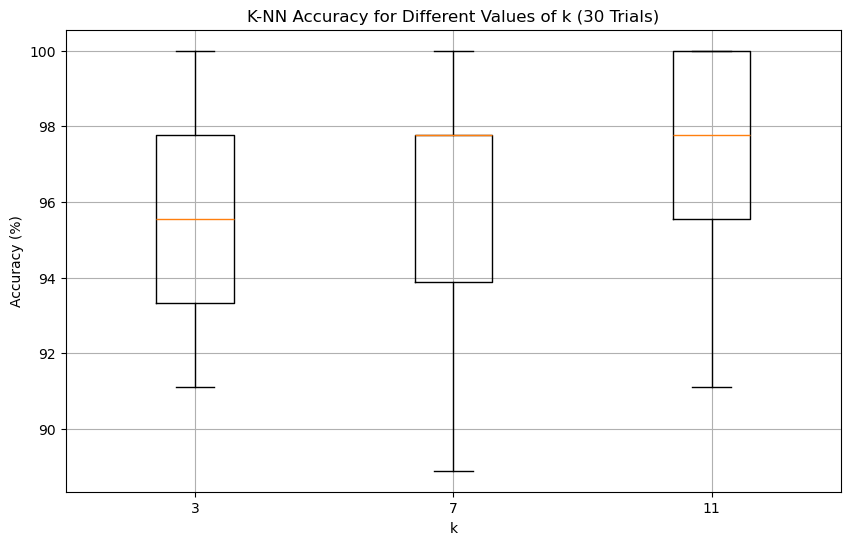

In [444]:
# Experiment parameters
k_values = [3, 7, 11]
repetitions = 30
results = {k: [] for k in k_values}

# Run experiment
for k in k_values:
    for _ in range(repetitions):
        train_data_set, test_data_set = split_data_random(data, split_ratio=0.7)
        accuracy = test_accuracy(test_data_set, train_data_set, k)
        results[k].append(accuracy)

print(results)

# Plot results
plt.figure(figsize=(10, 6))
plt.boxplot([results[k] for k in k_values], labels=k_values)
plt.title('K-NN Accuracy for Different Values of k (30 Trials)')
plt.xlabel('k')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()

In [445]:
# Ex 2.2 Confusion Matrix
import matplotlib.pyplot as plt

def compute_predictions(teste, treino, k=3):
    """
    Returns the true and predicted labels for the test set.
    """
    true_labels = []
    predicted_labels = []

    for plant in teste:
        true_label = plant[-1]
        predicted_label = knn(plant, treino, k)
        
        true_labels.append(true_label)
        predicted_labels.append(predicted_label)
    
    return true_labels, predicted_labels

def compute_confusion_matrix(true_labels, predicted_labels):
    # Identify unique classes and create a mapping from class names to indices
    classes = sorted(list(set(true_labels)))
    n_classes = len(classes)
    class_to_index = {cls: i for i, cls in enumerate(classes)}
    
    # Initialize confusion matrix
    confusion_matrix = np.zeros((n_classes, n_classes), dtype=int)
    
    # Populate confusion matrix
    for true_label, pred_label in zip(true_labels, predicted_labels):
        true_idx = class_to_index[true_label]
        pred_idx = class_to_index[pred_label]
        confusion_matrix[true_idx, pred_idx] += 1
    
    # Format matrix with labels
    formatted_matrix = [[""] + [f"Predicted {cls}:" for cls in classes]]
    for i, cls in enumerate(classes):
        formatted_matrix.append([f"Actual {cls}:"] + list(confusion_matrix[i]))
    
    return formatted_matrix

# Set k and split data
k = 3  # Ensure k is the same for both accuracy and confusion matrix calculations
train_data_set, test_data_set = split_data_random(data, split_ratio=0.7)

# Calculate and print test accuracy
accuracy = test_accuracy(test_data_set, train_data_set, k)
print(f"Test Accuracy: {accuracy:.2f}%")

# Compute true and predicted labels for confusion matrix
true_labels, predicted_labels = compute_predictions(test_data_set, train_data_set, k)

print(f"True labels: {true_labels}")
print(f"Predicted labels: {predicted_labels}")

cm = compute_confusion_matrix(true_labels, predicted_labels)


print("Confusion Matrix:")
for row in cm:
    print(row)


Test Accuracy: 93.33%
True labels: ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica']
Predicted labels: ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris

Confusion matrix:
[[21  0  0]
 [ 0  8  3]
 [ 0  0 13]]


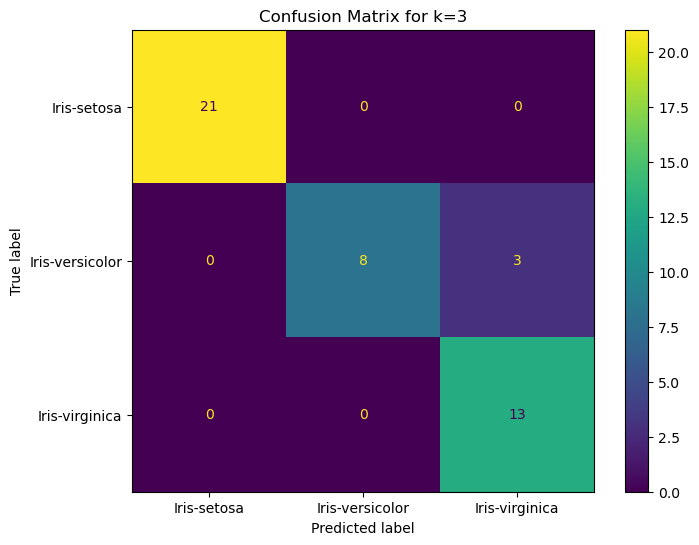

In [446]:
# With sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute and plot confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=np.unique(data[:, -1]))
print("Confusion matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(data[:, -1]))

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax)
plt.title(f'Confusion Matrix for k={k}')
plt.show()

### Ex 2.3

K should always be an odd number to prevent race conditions like the case where there are the same number of neighbors from two different classes.

In [447]:
# --------- Work in progres ---------

# Exercicio 3

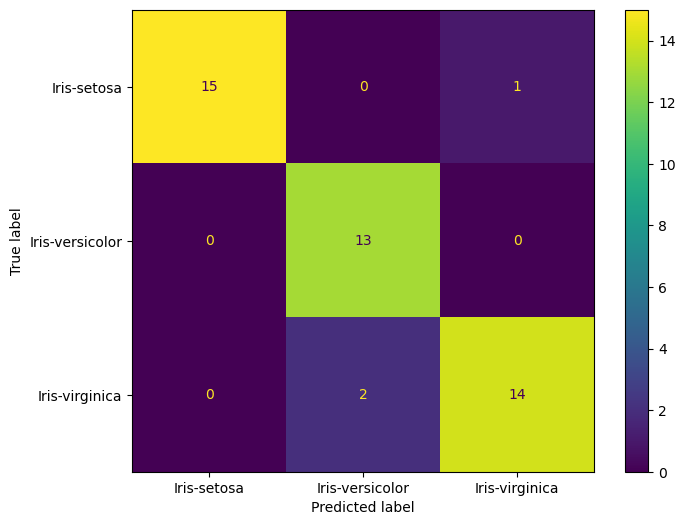

In [448]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

dados= pd.read_csv('./irisData/bezdekIris.data').values

# 0 - low 
# 1 - medium
# 2 - high

# 4.3 - 7.9 __ 1.2
# 2.0 - 4.4 __ 0.73
# 1.0 - 6.9 __ 1.967
# 0.1 - 2.5 __ 0.8

a = 0
for i in dados:
    if i[0] >= 4.3 and i[0] < 5.5:
        dados[a][0] = 0
    elif i[0] >= 5.5 and i[0] < 6.7:
        dados[a][0] = 1
    else:
        dados[a][0] = 2
    
    if i[1] >= 2.0 and i[1] < 2.73:
        dados[a][1] = 0
    elif i[1] >= 2.73 and i[1] < 3.46:
        dados[a][1] = 1
    else:
        dados[a][1] = 2
    
    if i[2] >= 1.0 and i[2] < 2.967:
        dados[a][2] = 0
    elif i[2] >= 2.967 and i[2] < 4.934:
        dados[a][2] = 1
    else:
        dados[a][2] = 2
    
    if i[3] >= 0.1 and i[0] < 0.9:
        dados[a][3] = 0
    elif i[3] >= 0.9 and i[3] < 1.7:
        dados[a][3] = 1
    else:
        dados[a][3] = 2
    
    a +=1

np.random.shuffle(dados)

treino = dados[:104]
teste = dados[104:]

def calc_probs2(dados):
    prob_classe = [0.0,0.0,0.0] # IS, IVE, IVI 
    dados0 = [[]] # IS
    dados1 = [[]] # IVE
    dados2 = [[]] # IVI

    for i in dados:
        if i[4] == "Iris-setosa":
            prob_classe[0] += 1
            dados0.append(i)
        elif i[4] == "Iris-versicolor":
            prob_classe[1] += 1
            dados1.append(i)
        else:
            prob_classe[2] += 1
            dados2.append(i)

    dados0.pop(0)
    dados1.pop(0)
    dados2.pop(0)

    dados0 = np.array(dados0)
    dados1 = np.array(dados1)
    dados2 = np.array(dados2)

    dadosT = np.array([dados0, dados1, dados2], dtype=object)

    prob_classe[0] = prob_classe[0]/len(dados)
    prob_classe[1] = prob_classe[1]/len(dados)
    prob_classe[2] = prob_classe[2]/len(dados)

    return dadosT, prob_classe


def calc_probs(dadosT,prob_classe,planta):
    probs_finais = [0,0,0]
    for j in range(len(dadosT)):
        conta = [0,0,0,0]
        for i in dadosT[j]:
            if i[0]==planta[0]:
                conta[0]+=1
            if i[1]==planta[1]:
                conta[1]+=1
            if i[2]==planta[2]:
                conta[2]+=1
            if i[3]==planta[3]:
                conta[3]+=1
        conta = [conta[0]/len(dadosT[j]),conta[1]/len(dadosT[j]),conta[2]/len(dadosT[j]),conta[3]/len(dadosT[j])]
        probs_finais[j] = conta[0] * conta[1] * conta[2] * conta[3] * prob_classe[j]

    return probs_finais

dadostodos, probsssss_class = calc_probs2(treino)

valores_corretos = []
valores_previstos = []

for i in teste:
    ok = calc_probs(dadostodos,probsssss_class,i)
    if ok[0] > ok[1] and ok[0] > ok[2]:
        valores_corretos.append(i[4])
        valores_previstos.append("Iris-setosa")
    elif ok[1] > ok[0] and ok[1] > ok[2]:
        valores_corretos.append(i[4])
        valores_previstos.append("Iris-versicolor")
    else:
        valores_corretos.append(i[4])
        valores_previstos.append("Iris-virginica")


cm = confusion_matrix(valores_corretos, valores_previstos, labels=np.unique(dados[:, -1]))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(dados[:, -1]))
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax)
plt.show()

# Exercicio 4

In [449]:
# 0 - low 
# 1 - medium
# 2 - high

# 4.3 - 7.9 __ 1.2
# 2.0 - 4.4 __ 0.73
# 1.0 - 6.9 __ 1.967
# 0.1 - 2.5 __ 0.8
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

dados= pd.read_csv('./irisData/bezdekIris.data').values

a = 0
for i in dados:
    if i[0] >= 4.3 and i[0] < 5.5:
        dados[a][0] = 0
    elif i[0] >= 5.5 and i[0] < 6.7:
        dados[a][0] = 1
    else:
        dados[a][0] = 2
    
    if i[1] >= 2.0 and i[1] < 2.73:
        dados[a][1] = 0
    elif i[1] >= 2.73 and i[1] < 3.46:
        dados[a][1] = 1
    else:
        dados[a][1] = 2
    
    if i[2] >= 1.0 and i[2] < 2.967:
        dados[a][2] = 0
    elif i[2] >= 2.967 and i[2] < 4.934:
        dados[a][2] = 1
    else:
        dados[a][2] = 2
    
    if i[3] >= 0.1 and i[0] < 0.9:
        dados[a][3] = 0
    elif i[3] >= 0.9 and i[3] < 1.7:
        dados[a][3] = 1
    else:
        dados[a][3] = 2
    
    a +=1

print(dados)

[[0 1 0 0 'Iris-setosa']
 [0 1 0 0 'Iris-setosa']
 [0 1 0 0 'Iris-setosa']
 [0 2 0 0 'Iris-setosa']
 [0 2 0 0 'Iris-setosa']
 [0 1 0 0 'Iris-setosa']
 [0 1 0 0 'Iris-setosa']
 [0 1 0 0 'Iris-setosa']
 [0 1 0 0 'Iris-setosa']
 [0 2 0 0 'Iris-setosa']
 [0 1 0 0 'Iris-setosa']
 [0 1 0 0 'Iris-setosa']
 [0 1 0 0 'Iris-setosa']
 [1 2 0 2 'Iris-setosa']
 [1 2 0 2 'Iris-setosa']
 [0 2 0 0 'Iris-setosa']
 [0 2 0 0 'Iris-setosa']
 [1 2 0 2 'Iris-setosa']
 [0 2 0 0 'Iris-setosa']
 [0 1 0 0 'Iris-setosa']
 [0 2 0 0 'Iris-setosa']
 [0 2 0 0 'Iris-setosa']
 [0 1 0 0 'Iris-setosa']
 [0 1 0 0 'Iris-setosa']
 [0 1 0 0 'Iris-setosa']
 [0 1 0 0 'Iris-setosa']
 [0 2 0 0 'Iris-setosa']
 [0 1 0 0 'Iris-setosa']
 [0 1 0 0 'Iris-setosa']
 [0 1 0 0 'Iris-setosa']
 [0 1 0 0 'Iris-setosa']
 [0 2 0 0 'Iris-setosa']
 [1 2 0 2 'Iris-setosa']
 [0 1 0 0 'Iris-setosa']
 [0 1 0 0 'Iris-setosa']
 [1 2 0 2 'Iris-setosa']
 [0 2 0 0 'Iris-setosa']
 [0 1 0 0 'Iris-setosa']
 [0 1 0 0 'Iris-setosa']
 [0 2 0 0 'Iris-setosa']


Creating 3 more databses, one with the low elements of the first column, one with the medium and one with the high.

In [450]:
import numpy as np
from collections import Counter
import math

# Part 1: Splitting the dataset based on the first column
low_dataset = [row for row in dados if row[0] == 0] # has all the elements with value low in the first column
medium_dataset = [row for row in dados if row[0] == 1] # has all the elements with value medium in the first column
high_dataset = [row for row in dados if row[0] == 2] # has all the elements with value high in the first column

## Ex 4.1

Calculate the Entropy (Measure of disorder in the dataset, heigher entropy means the dataset has a bigger mixture of classes)

General formula for entropy:
$$
H(S) = -\sum_{i=1}^{n} p(i) \log_2 p(i)
$$
We are using binary classification, just for *Iris-setosa* right now, so $(p+)$ is the probability on the dataset of being an *Iris-setosa* and $(p-)$ the probability of not being an *Iris-setosa*. So the calculation will be:
$$
 \text{entropy}(S) = - (p+) \cdot \log_2(p+) - (p-) \cdot \log_2(p-) 
$$

In [451]:
# Calculate the Entropy
def calculate_entropy_target_iris_setosa(data):
    dadosT, prob_classe = calc_probs2(data) # iris setosa is always the first
    p_plus = prob_classe[0]
    p_minus = prob_classe[1] + prob_classe[2]

    if p_minus == 0:
        return 0 
    if p_plus == 0:
        return 0

    entropy = -p_plus * math.log2(p_plus) - p_minus * math.log2(p_minus)
    return entropy

# Print entropies
print("Complete dataset entropy:", calculate_entropy_target_iris_setosa(dados))
print("Low dataset entropy:", calculate_entropy_target_iris_setosa(low_dataset))
print("Medium dataset entropy:", calculate_entropy_target_iris_setosa(medium_dataset))
print("High dataset entropy:", calculate_entropy_target_iris_setosa(high_dataset))

Complete dataset entropy: 0.9137564309378818
Low dataset entropy: 0.5770042503157248
Medium dataset entropy: 0.37123232664087563
High dataset entropy: 0


Calculate Gain

In [452]:

def calculate_gain(S, subsets):
    """Calculate the information gain from partitioning dataset S into subsets."""
    total_entropy = calculate_entropy(S)
    total_len = len(S)
    weighted_entropy = sum((len(subset) / total_len) * calculate_entropy(subset) for subset in subsets)
    gain = total_entropy - weighted_entropy
    return gain

# Part 3: Calculate the gain for splitting by the first column
gain_first_column = calculate_gain(dados, [low_dataset, medium_dataset, high_dataset])
print("Gain from splitting by first column:", gain_first_column)

# Part 4: Calculate gain for each feature in the dataset
feature_gains = []
for col in range(4):  # Iterate over each feature column
    subsets = {value: [row for row in dados if row[col] == value] for value in set(row[col] for row in dados)}
    gain = calculate_gain(dados, list(subsets.values()))
    feature_gains.append((col, gain))
    print(f"Gain from splitting by column {col}:", gain)

# Part 5: Identify the feature with the highest gain
best_feature = max(feature_gains, key=lambda x: x[1])
print(f"Feature with greatest gain is column {best_feature[0]} with gain {best_feature[1]}")


Gain from splitting by first column: 0.6171486721332871
Gain from splitting by column 0: 0.6171486721332871
Gain from splitting by column 1: 0.28284953576698424
Gain from splitting by column 2: 1.3228516736461613
Gain from splitting by column 3: 0.9885532096482341
Feature with greatest gain is column 2 with gain 1.3228516736461613
